In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

#Reading Data
data = pd.read_csv('head_brain.csv')
print (data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [6]:
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to caluclate b1 and b2
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i]-mean_x) * (Y[i] - mean_y)
    denominator += (X[i] - mean_x) ** 2
b1 = numerator / denominator
b0 = mean_y - (b1 * mean_x)

# Print Coefficients
print(b1, b0)


0.26342933948939945 325.57342104944223


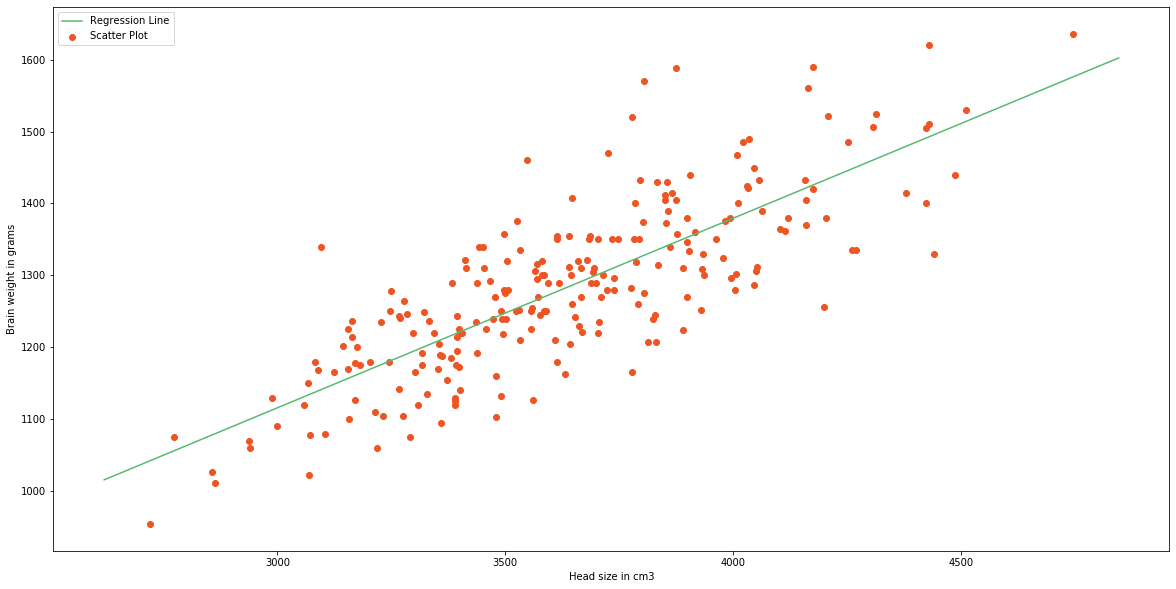

In [16]:
# Plotting values and Regression line

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Plotting line
plt.plot(x, y, color='#58b970', label='Regression Line')

# Plotting scatter points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head size in cm3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [25]:
predicted_diff = 0
actual_diff = 0
numerator = 0
denominator = 0 
for i in range(n):
     predicted_y = b0 + b1 * X[i]       
     numerator += (predicted_y - mean_y) ** 2
     denominator += (Y[i] - mean_y) ** 2
print (numerator / denominator)    

0.6393117199570001


In [38]:
# Using scikit learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learning
X = X.reshape(n, 1)
Y = Y.reshape(n, 1)

# Creating Model
reg = LinearRegression()

# Fitting training data
reg = reg.fit(X, Y)
print (reg)

# Y Prediction
Y_pred = reg.predict(X)
print (Y_pred)

# Calculating R2 Score
r2_score = reg.score(X, Y)

print(r2_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[[1514.16660083]
 [1310.27229206]
 [1448.04583661]
 [1320.5460363 ]
 [1425.9177721 ]
 [1269.96760312]
 [1322.65347102]
 [1263.11844029]
 [1277.34362462]
 [1374.5490509 ]
 [1232.56063691]
 [1377.44677363]
 [1284.45621679]
 [1434.08408162]
 [1335.03464997]
 [1346.62554091]
 [1246.78582124]
 [1238.61951172]
 [1140.88722677]
 [1490.98481895]
 [1347.15239959]
 [1391.40852862]
 [1327.65862847]
 [1302.89627056]
 [1576.07249561]
 [1490.72138961]
 [1388.77423523]
 [1385.08622448]
 [1235.45835965]
 [1425.39091342]
 [1323.1803297 ]
 [1325.55119375]
 [1406.42400097]
 [1421.70290266]
 [1420.91261465]
 [1330.29292186]
 [1254.68870143]
 [1312.90658546]
 [1203.84683891]
 [1245.46867455]
 [1369.28046411]
 [1248.89325596]
 [1462.27102095]
 [1327.65862847]
 [1343.2009595 ]
 [1388.24737655]
 [1460.42701557]
 [1159.32728053]
 [1284.71964613]
 [1285.50993415]
 [1350.576981  ]
 [1324.76090573]
 [1450.41670067]
 [1395.88682739]
 [